In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
file_path = r"C:\Users\HARSHITHA\Downloads\price_paid_records.csv.zip"
df = pd.read_csv(file_path, compression="zip")

# Remove trailing spaces from column names
df.columns = df.columns.str.strip()

In [3]:
df["Date of Transfer"] = pd.to_datetime(df["Date of Transfer"])
df["Year"] = df["Date of Transfer"].dt.year

In [4]:
sales_per_year = df.groupby("Year")["Price"].count()
sales_per_year

Year
1995     796777
1996     964695
1997    1093669
1998    1049739
1999    1194064
2000    1128742
2001    1245112
2002    1351256
2003    1257140
2004    1270409
2005    1061686
2006    1326161
2007    1272921
2008     650492
2009     625662
2010     663342
2011     661055
2012     668295
2013     810111
2014     982943
2015    1007421
2016    1032558
2017     375098
Name: Price, dtype: int64

In [5]:
sales_per_year_sorted = sales_per_year.sort_values(ascending=False)
sales_per_year_sorted

Year
2002    1351256
2006    1326161
2007    1272921
2004    1270409
2003    1257140
2001    1245112
1999    1194064
2000    1128742
1997    1093669
2005    1061686
1998    1049739
2016    1032558
2015    1007421
2014     982943
1996     964695
2013     810111
1995     796777
2012     668295
2010     663342
2011     661055
2008     650492
2009     625662
2017     375098
Name: Price, dtype: int64

In [6]:
avg_price_by_type = df.groupby("Property Type")["Price"].mean()
avg_price_by_type

Property Type
D    2.500975e+05
F    1.749829e+05
O    1.295774e+06
S    1.489675e+05
T    1.365340e+05
Name: Price, dtype: float64

In [7]:
avg_price_by_type_sorted = avg_price_by_type.sort_values(ascending=False)
avg_price_by_type_sorted

Property Type
O    1.295774e+06
D    2.500975e+05
F    1.749829e+05
S    1.489675e+05
T    1.365340e+05
Name: Price, dtype: float64

In [8]:
avg_price_year_property = df.groupby(["Year", "Property Type"])["Price"].mean()
avg_price_year_property

Year  Property Type
1995  D                1.047203e+05
      F                5.896225e+04
      O                2.810000e+06
      S                6.024973e+04
      T                5.112041e+04
                           ...     
2017  D                3.967670e+05
      F                2.903760e+05
      O                9.979639e+05
      S                2.437581e+05
      T                2.306692e+05
Name: Price, Length: 114, dtype: float64

In [9]:
avg_price_year_property = avg_price_year_property.reset_index()
avg_price_year_property

,Year,Property Type,Price
0,1995,D,1.047203e+05
1,1995,F,5.896225e+04
2,1995,O,2.810000e+06
3,1995,S,6.024973e+04
4,1995,T,5.112041e+04
...,...,...,...
109,2017,D,3.967670e+05
110,2017,F,2.903760e+05
111,2017,O,9.979639e+05
112,2017,S,2.437581e+05


In [10]:
avg_price_by_town = df.groupby("Town/City")["Price"].mean()

In [11]:
top10_towns = avg_price_by_town.sort_values(ascending=False).head(10)
top10_towns

Town/City
GATWICK              1.791000e+07
THORNHILL            9.850000e+05
VIRGINIA WATER       7.585094e+05
CHALFONT ST GILES    7.490593e+05
COBHAM               6.200771e+05
BEACONSFIELD         5.970537e+05
KESTON               5.882554e+05
ESHER                5.607228e+05
GERRARDS CROSS       5.261428e+05
ASCOT                4.711436e+05
Name: Price, dtype: float64

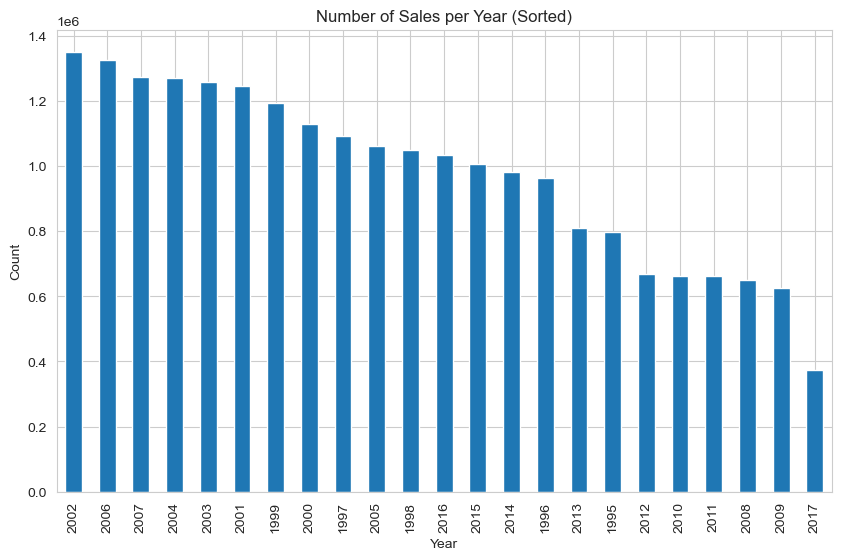

In [12]:
plt.figure(figsize=(10,6))
sales_per_year_sorted.plot(kind="bar")
plt.title("Number of Sales per Year (Sorted)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

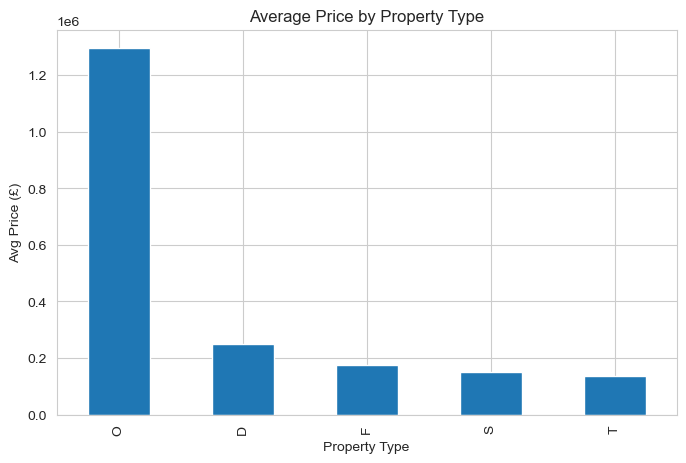

In [13]:
plt.figure(figsize=(8,5))
avg_price_by_type_sorted.plot(kind="bar")
plt.title("Average Price by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Avg Price (£)")
plt.show()

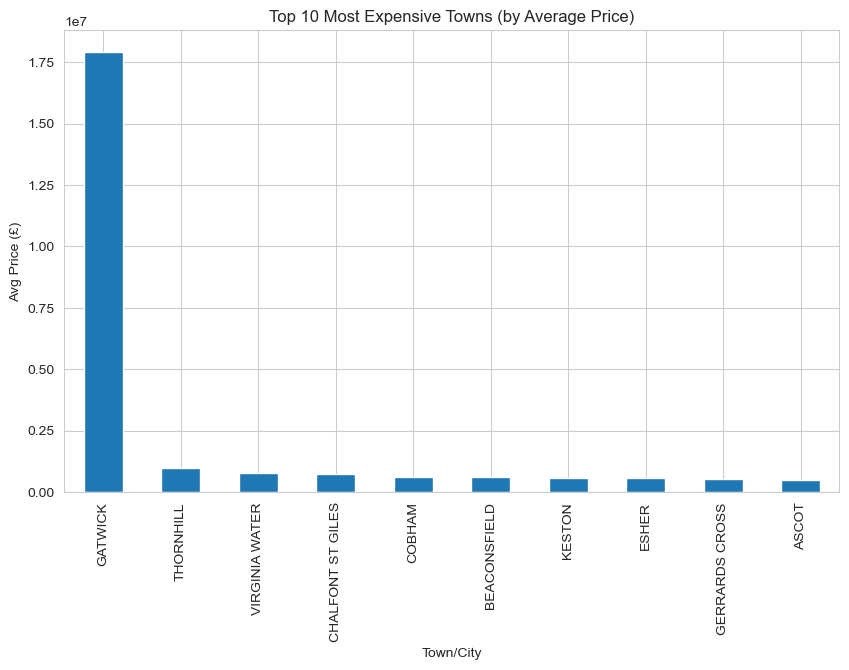

In [14]:
plt.figure(figsize=(10,6))
top10_towns.plot(kind="bar")
plt.title("Top 10 Most Expensive Towns (by Average Price)")
plt.xlabel("Town/City")
plt.ylabel("Avg Price (£)")
plt.show()

In [15]:
df_sorted_by_price = df.sort_values(by="Price", ascending=False)
df_sorted_by_price.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,Year
21906462,{50F18103-E682-9FD5-E050-A8C063054923},98900000,2016-11-24,O,N,F,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A,2016
22186198,{50F18103-F5E4-9FD5-E050-A8C063054923},98765391,2017-02-09,O,N,L,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,B,A,2017
22346117,{4E95D758-283E-EDA1-E050-A8C0630539E2},98446300,2017-04-06,O,N,F,LONDON,CAMDEN,GREATER LONDON,B,A,2017
20231796,{23B6165F-33A2-FCF4-E050-A8C0620577FA},98250000,2015-10-21,O,N,F,READING,WOKINGHAM,WOKINGHAM,B,A,2015
22312341,{5376B386-560C-34C1-E053-6B04A8C09FF6},97630000,2017-05-25,O,N,L,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A,2017


In [16]:
df_sorted_by_year_price = df.sort_values(by=["Year", "Price"], ascending=[True, False])
df_sorted_by_year_price.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,Year
283654,{21E5FEB6-8C25-2439-E050-A8C06205342E},5610000,1995-01-09,O,N,F,LEATHERHEAD,MOLE VALLEY,SURREY,B,A,1995
312872,{71A16873-2ABB-45F1-91E6-1137F7C9696D},5610000,1995-01-09,F,N,F,LEATHERHEAD,MOLE VALLEY,SURREY,A,A,1995
217775,{3757D96D-937B-469B-AE92-E51D8A3C76E1},3700500,1995-01-31,F,N,F,SWINDON,THAMESDOWN,THAMESDOWN,A,A,1995
723153,{CE2466D1-C6BC-4D2D-96F1-FD6F7946F552},3650000,1995-11-06,T,N,L,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A,1995
717406,{E72BB012-0C9C-40C4-B314-F2C90038286A},3500000,1995-08-03,D,N,F,LONDON,BARNET,GREATER LONDON,A,A,1995
